# Cleaning University of California Berkeley Power Consumption Dataset

The data retrieved from [UCB's energy dashboard](https://engagementdashboard.com/ucb/ucb) regarding power consumption in UCB's Mechanical Engineering building is in the form of a `json` format. Here we'll be converting it into a `csv` file for later data analysis. 


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import json
import pprint
from datetime import datetime

In [3]:
#Format into dates
def format_time(unix_timestamp):
    format = '%Y-%m-%d'
    ts = int(unix_timestamp)
    return datetime.utcfromtimestamp(ts).strftime(format)

#Create list of datetime objects from timestamps
def gen_datetimes(li):
    datetimes = []
    for time in li:
        datetimes.append(datetime.utcfromtimestamp(time))
    return datetimes

#Get day of week based on date
def get_weekday(dates):
    return [1 if (datetime.strptime(d,"%Y-%m-%d").weekday() >= 5) else 0 for d in dates]

In [4]:
with open('Datasets/UCB_PowerConsumption.json') as json_file:
    data = json.load(json_file)[0]
    
pprint.pprint(data)

{'actual': {'data': [{'completeness': 2.0,
                      'timestamp': 1573632000,
                      'value': 9292.0},
                     {'completeness': 2.0,
                      'timestamp': 1573718400,
                      'value': 9245.0},
                     {'completeness': 2.0,
                      'timestamp': 1573804800,
                      'value': 9150.0},
                     {'completeness': 2.0,
                      'timestamp': 1573891200,
                      'value': 8332.0},
                     {'completeness': 2.0,
                      'timestamp': 1573977600,
                      'value': 8239.0},
                     {'completeness': 2.0,
                      'timestamp': 1574064000,
                      'value': 9245.0},
                     {'completeness': 2.0,
                      'timestamp': 1574150400,
                      'value': 9339.0},
                     {'completeness': 2.0,
                      'timestamp': 1574236800,


                      'timestamp': 1597820400,
                      'value': 7686.0},
                     {'completeness': 2.0,
                      'timestamp': 1597906800,
                      'value': 7577.0},
                     {'completeness': 2.0,
                      'timestamp': 1597993200,
                      'value': 7744.0},
                     {'completeness': 2.0,
                      'timestamp': 1598079600,
                      'value': 7411.0},
                     {'completeness': 2.0,
                      'timestamp': 1598166000,
                      'value': 7390.0},
                     {'completeness': 2.0,
                      'timestamp': 1598252400,
                      'value': 7802.0},
                     {'completeness': 2.0,
                      'timestamp': 1598338800,
                      'value': 7702.0},
                     {'completeness': 2.0,
                      'timestamp': 1598425200,
                      'value': 7789.0},
   

                        'timestamp': 1589958000,
                        'value': 8861.446},
                       {'completeness': 1.0,
                        'timestamp': 1590044400,
                        'value': 8827.334},
                       {'completeness': 1.0,
                        'timestamp': 1590130800,
                        'value': 8689.264},
                       {'completeness': 1.0,
                        'timestamp': 1590217200,
                        'value': 7818.239},
                       {'completeness': 1.0,
                        'timestamp': 1590303600,
                        'value': 7849.022},
                       {'completeness': 1.0,
                        'timestamp': 1590390000,
                        'value': 8639.718},
                       {'completeness': 1.0,
                        'timestamp': 1590476400,
                        'value': 8786.161},
                       {'completeness': 1.0,
                        'timestamp

                        'value': 8901.246},
                       {'completeness': 1.0,
                        'timestamp': 1603350000,
                        'value': 8881.422},
                       {'completeness': 1.0,
                        'timestamp': 1603436400,
                        'value': 8680.316},
                       {'completeness': 1.0,
                        'timestamp': 1603522800,
                        'value': 7743.3345},
                       {'completeness': 1.0,
                        'timestamp': 1603609200,
                        'value': 7743.9727},
                       {'completeness': 1.0,
                        'timestamp': 1603695600,
                        'value': 8688.38},
                       {'completeness': 1.0,
                        'timestamp': 1603782000,
                        'value': 8900.09},
                       {'completeness': 1.0,
                        'timestamp': 1603868400,
                        'value': 8

In [5]:
#Split dataset
actual = data['actual']
expected = data['baseline']

#Create new dataframe
df_power = pd.DataFrame(columns = ['act_power', 'exp_power', 'date','timestamp'])
df_power.head()

,act_power,exp_power,date,timestamp


In [6]:
actual_li = actual['data']
expected_li = expected['data']
loc = 0

for i in range(len(actual_li)):
    #Get corresponding dicts
    dt1 = actual_li[i]
    dt2 = expected_li[i]
    
    #Ensure they're of the same time
    assert(dt1['timestamp'] == dt2['timestamp'])
    
    #Get data in appropriate format
    time = format_time(dt1['timestamp'])
    act_power = dt1['value']
    exp_power = dt2['value']
    ts = dt1['timestamp']
    
    #Add to dataframe
    df_power.loc[loc] = [act_power, exp_power, time, ts]
    
    #Increment location tracker
    loc += 1
    
#Add Weekdays 
df_power['Weekday'] = get_weekday(df_power['date'])

#Print out final data
df_power.head()

,act_power,exp_power,date,timestamp,Weekday
0,9292.0,8868.1940,2019-11-13,1573632000,0
1,9245.0,8777.3200,2019-11-14,1573718400,0
2,9150.0,8667.0920,2019-11-15,1573804800,0
3,8332.0,7767.8486,2019-11-16,1573891200,1
4,8239.0,7790.5220,2019-11-17,1573977600,1


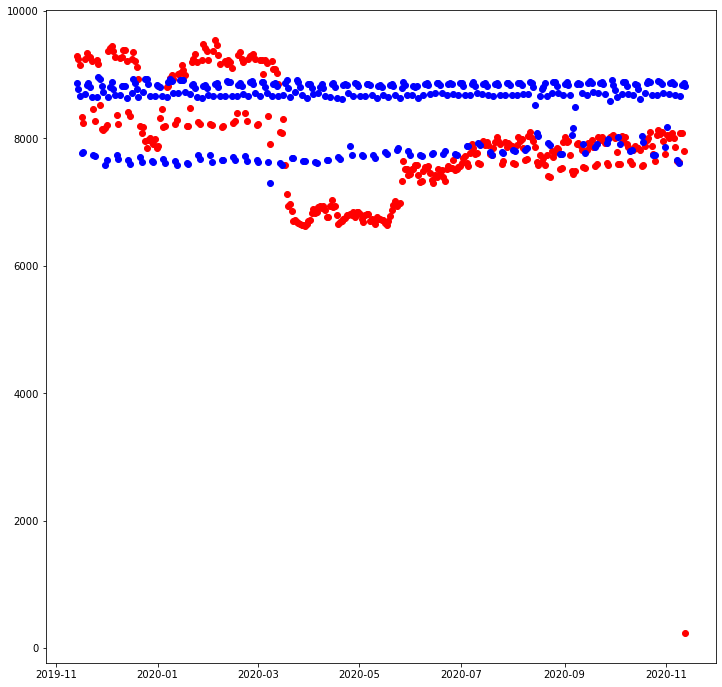

In [7]:
#Plotting data for exploratory analysis 
from matplotlib.dates import date2num
import matplotlib.pyplot as plt

#Select subset of data by altering variables. Choose entire scale by 1, 0
num_split = 1
num_piece = 0
df = np.split(df_power, num_split)[num_piece]

plt.figure(figsize=(12,12))
#Convert timestamps into correct date format for matplotlib
dates = date2num(gen_datetimes(df['timestamp']))
#Plot points
plt.plot_date(dates, df['act_power'], color='Red')
plt.plot_date(dates, df['exp_power'], color='Blue')
plt.show()

In [8]:
#Place dataset in .csv file
df_power.to_csv('Datasets/UCB_PowerConsumption.csv', index=False)

# Merging with Weather Data

In [9]:
df_weather = pd.read_csv('Datasets/Berkeley_Weather.csv', skiprows=2)
df_power = pd.read_csv('Datasets/UCB_PowerConsumption.csv')

In [10]:
df_weather.describe()

,Year,Month,Day,Hour,Minute,DNI,Dew Point,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
count,17520.0,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
mean,2019.0,6.526027,15.720548,11.500000,15.000000,260.012614,9.294344,2.474070,1.493647,229.980479,78.368464,13.829697,995.520148
std,0.0,3.447950,8.796498,6.922384,15.000428,359.374979,3.912063,1.157292,0.554094,85.516245,21.518094,5.391254,4.787277
min,2019.0,1.000000,1.000000,0.000000,0.000000,0.000000,-9.900000,0.200000,0.200000,0.000000,11.930000,1.000000,976.000000
25%,2019.0,4.000000,8.000000,5.750000,0.000000,0.000000,7.500000,1.600000,1.100000,191.000000,64.197500,10.100000,993.000000
50%,2019.0,7.000000,16.000000,11.500000,15.000000,0.000000,10.000000,2.300000,1.400000,262.000000,85.680000,12.800000,995.000000
75%,2019.0,10.000000,23.000000,17.250000,30.000000,585.000000,12.000000,3.100000,1.800000,281.000000,96.830000,16.900000,998.000000
max,2019.0,12.000000,31.000000,23.000000,30.000000,1006.000000,17.900000,8.600000,3.500000,360.000000,100.000000,34.700000,1011.000000


In [11]:
df_power.describe()

,act_power,exp_power,timestamp,Weekday
count,366.000000,366.000000,3.660000e+02,366.000000
mean,7906.937158,8492.607298,1.589398e+09,0.284153
std,889.463622,475.480141,9.139887e+06,0.451627
min,237.000000,7301.636000,1.573632e+09,0.000000
25%,7507.750000,7916.461650,1.581516e+09,0.000000
50%,7882.000000,8700.640500,1.589396e+09,0.000000
75%,8245.000000,8848.290500,1.597280e+09,1.000000
max,9543.000000,8960.755000,1.605168e+09,1.000000


In [12]:
df_weather = df_weather.drop(columns=['Hour', 'Minute'])
df_weather = df_weather[df_weather.DNI != 0]
df_weather.head(10)

,Year,Month,Day,DNI,Dew Point,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
15,2019,1,1,45,-2.7,2.9,0.3,33,69.25,2.4,1005
16,2019,1,1,263,-2.3,3.0,0.4,35,66.43,3.4,1005
17,2019,1,1,704,-2.3,3.1,0.4,37,61.93,4.4,1005
18,2019,1,1,802,-2.9,3.2,0.4,39,54.61,5.5,1006
19,2019,1,1,858,-2.9,3.1,0.4,40,50.97,6.5,1006
20,2019,1,1,889,-3.9,2.9,0.5,41,44.07,7.6,1005
21,2019,1,1,916,-3.9,2.6,0.5,38,41.74,8.4,1005
22,2019,1,1,937,-4.8,2.3,0.5,36,36.80,9.2,1005
23,2019,1,1,948,-4.8,2.2,0.5,28,35.11,9.9,1005
24,2019,1,1,952,-5.4,2.1,0.6,21,32.30,10.5,1004


In [13]:
#Take mean, max and min for each DNI in DataFrame and mean for everything else
max_dni = df_weather.groupby(['Year', 'Month', 'Day']).max().reset_index()['DNI']
min_dni = df_weather.groupby(['Year', 'Month', 'Day']).min().reset_index()['DNI']
df_weather = pd.DataFrame(df_weather.groupby(['Year', 'Month', 'Day']).mean().reset_index())
df_weather.insert(4, 'DNI Max', max_dni)
df_weather.insert(5, 'DNI Min', min_dni)
df_weather.head()

,Year,Month,Day,DNI,DNI Max,DNI Min,Dew Point,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
0,2019,1,1,722.400000,952,45,-3.670000,2.120000,0.555000,47.75,43.414000,8.555,1004.55
1,2019,1,2,714.100000,925,67,0.790000,1.465000,1.000000,66.05,57.277500,9.150,1004.40
2,2019,1,3,480.100000,899,14,2.240000,2.040000,0.975000,75.85,64.874500,8.680,1001.75
3,2019,1,4,579.950000,912,30,5.330000,1.675000,0.985000,111.30,73.464000,9.970,994.65
4,2019,1,5,25.388889,93,1,9.966667,6.194444,1.955556,182.50,90.365556,11.500,985.00


In [14]:
df_weather.describe()

,Year,Month,Day,DNI,DNI Max,DNI Min,Dew Point,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
count,365.0,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2019.0,6.526027,15.720548,498.180497,780.712329,30.317808,9.059895,2.636308,1.494509,224.030310,66.859900,16.223326,995.686389
std,0.0,3.452584,8.808321,252.846048,270.017108,40.901420,3.986176,1.117535,0.527679,70.040489,16.672748,4.678366,4.606718
min,2019.0,1.000000,1.000000,6.000000,9.000000,1.000000,-7.395455,0.742857,0.286957,21.363636,19.850435,6.516667,979.058824
25%,2019.0,4.000000,8.000000,285.368421,754.000000,3.000000,7.060000,1.734615,1.133333,179.619048,58.423636,12.600000,993.000000
50%,2019.0,7.000000,16.000000,597.142857,919.000000,14.000000,10.057143,2.556250,1.433333,251.000000,69.216250,16.068182,995.333333
75%,2019.0,10.000000,23.000000,714.038462,943.000000,40.000000,11.800000,3.284615,1.862500,270.892857,78.724074,19.406667,998.192308
max,2019.0,12.000000,31.000000,819.478261,1006.000000,232.000000,16.160714,6.340909,3.232000,349.238095,96.725000,29.032000,1009.550000


In [15]:
df_power[['Year', 'Month', 'Day']] = df.date.str.split('-', expand=True).apply(pd.to_numeric)
df_power.head()

,act_power,exp_power,date,timestamp,Weekday,Year,Month,Day
0,9292.0,8868.1940,2019-11-13,1573632000,0,2019,11,13
1,9245.0,8777.3200,2019-11-14,1573718400,0,2019,11,14
2,9150.0,8667.0920,2019-11-15,1573804800,0,2019,11,15
3,8332.0,7767.8486,2019-11-16,1573891200,1,2019,11,16
4,8239.0,7790.5220,2019-11-17,1573977600,1,2019,11,17


In [16]:
df_merge = df_weather.merge(df_power[['act_power', 'Month', 'Day', 'Weekday']], left_on=('Month', 'Day'), right_on=('Month', 'Day'), how = 'inner', suffixes=('_left','_right'))
df_merge = df_merge.rename(columns={'act_power': 'Power Consumption', 'DNI':'DNI Mean'})
df_merge.head()

,Year,Month,Day,DNI Mean,DNI Max,DNI Min,Dew Point,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Power Consumption,Weekday
0,2019,1,1,722.400000,952,45,-3.670000,2.120000,0.555000,47.75,43.414000,8.555,1004.55,7888.0,0
1,2019,1,2,714.100000,925,67,0.790000,1.465000,1.000000,66.05,57.277500,9.150,1004.40,8323.0,0
2,2019,1,3,480.100000,899,14,2.240000,2.040000,0.975000,75.85,64.874500,8.680,1001.75,8468.0,0
3,2019,1,4,579.950000,912,30,5.330000,1.675000,0.985000,111.30,73.464000,9.970,994.65,8177.0,1
4,2019,1,5,25.388889,93,1,9.966667,6.194444,1.955556,182.50,90.365556,11.500,985.00,8188.0,1


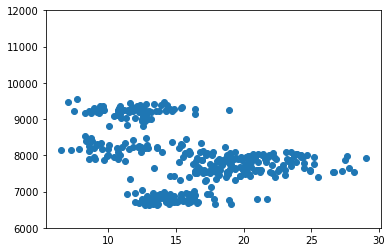

In [17]:
#Exploratory Analysis between Temperature and Power Consumption
import matplotlib.pyplot as plt

plt.ylim([6000,12000])
plt.scatter(df_merge['Temperature'], df_merge['Power Consumption'])
plt.show()

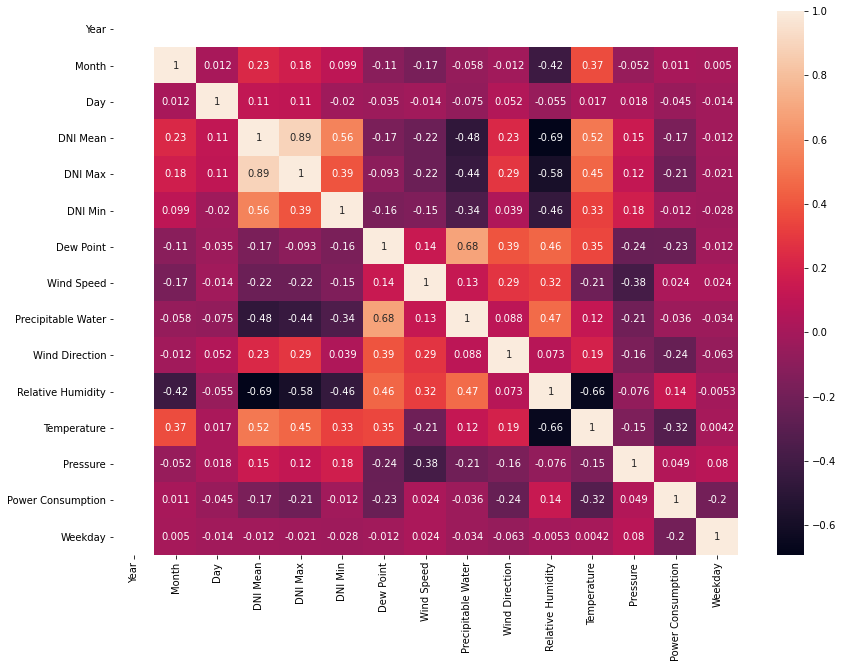

In [18]:
plt.figure(figsize=(14,10))
sns.heatmap(df_merge.corr(), annot=True)
plt.show()

In [19]:
df_merge.to_csv('Datasets/UCB_PowerWeatherData.csv', index=False)